In [1]:
##读fits文件
from astropy.io import fits
hdu = fits.open('HIPASS_J034-28.fits')
hd=hdu[0].header
print(hd)

SIMPLE  =                    T  /                                               BITPIX  =                  -32  /                                               NAXIS   =                    3  /                                               NAXIS1  =                 1024  /                                               NAXIS2  =                    1  /                                               NAXIS3  =                    1  /                                               EXTEND  =                    T  /                                               BSCALE  =    1.00000000000E+00  /                                               BZERO   =    0.00000000000E+00  /                                               BUNIT   = 'JY/BEAM '  /                                                         DATE-OBS= '2000-01-01T12:00:00.0'  /                                            CRPIX1  =    1.29000000566E+02  /                                               CDELT1  =    1.32267903286E+04  /       

In [2]:
print(repr(hd))

SIMPLE  =                    T  /                                               
BITPIX  =                  -32  /                                               
NAXIS   =                    3  /                                               
NAXIS1  =                 1024  /                                               
NAXIS2  =                    1  /                                               
NAXIS3  =                    1  /                                               
EXTEND  =                    T  /                                               
BSCALE  =    1.00000000000E+00  /                                               
BZERO   =    0.00000000000E+00  /                                               
BUNIT   = 'JY/BEAM '  /                                                         
DATE-OBS= '2000-01-01T12:00:00.0'  /                                            
CRPIX1  =    1.29000000566E+02  /                                               
CDELT1  =    1.32267903286E+

In [3]:
print(hdu.info())

Filename: HIPASS_J034-28.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      68   (1024, 1, 1)   float32   
None


In [4]:
data = hdu[0].data
print(data)

[[[-0.01422161 -0.02154606 -0.01147495 ... -0.01940976  0.00088505
   -0.00964384]]]


[-300275.30516178 -300272.51156821 -300269.71797463 ... -297423.04611833
 -297420.25252475 -297417.45893117]
[-1303483.68480276 -1290256.89447416 -1277030.10414556 ...
 12201069.24069783 12214296.03102644 12227522.82135504]


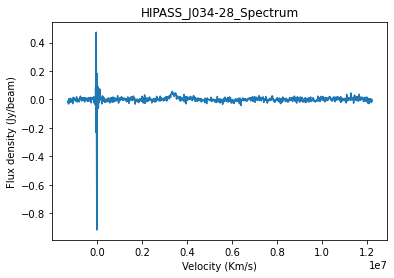

In [9]:
##spectrum
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits

hdu = fits.open('HIPASS_J034-28.fits')
data = hdu[0].data
hdr = hdu[0].header
hdu.close()

c = 300000.0
restfreq = hdu[0].header['RESTFREQ']
freq = hdr['CRVAL1']+(np.arange(hdr[ 'NAXIS1'])- hdr['CRPIX1'])* hdr['CDELT1']

velocity = c*((freq-restfreq)/restfreq)
print(velocity)
print(freq)

plt.plot(freq, data[0,0,:])  
plt.xlabel("Velocity (Km/s)")
plt.ylabel("Flux density (Jy/beam)")
plt.title("HIPASS_J034-28_Spectrum")
plt.show()

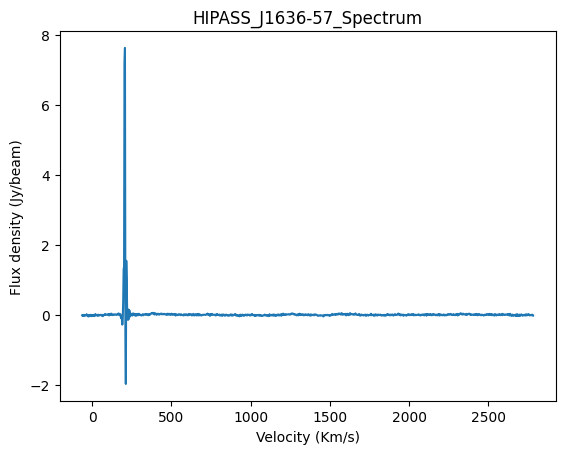

In [10]:
##spectrum
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits

hdu = fits.open('HIPASS_J1636-57.fits')
data = hdu[0].data
hdu.close()

c = 300000.0
crval1 = hdu[0].header['CRVAL1']
cdelt1 = hdu[0].header['CDELT1']
naxis1 = hdu[0].header['NAXIS1']
restfreq = hdu[0].header['RESTFREQ']
crval1_kms = (crval1 * c) / restfreq
cdelt1_kms = (cdelt1 * c) / restfreq
velocity = [crval1_kms + i * cdelt1_kms for i in range(naxis1)]

plt.plot(velocity, data[0,0,:])  
plt.xlabel("Velocity (Km/s)")
plt.ylabel("Flux density (Jy/beam)")
plt.title("HIPASS_J1636-57_Spectrum")
plt.show()